In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/merged_data/ETH.csv')
df.head()

,Unnamed: 0,time,BTC_open,BTC_close,BTC_volume,ETH_open,ETH_close,ETH_volume
0,0,2016-12-10 03:00:00,774.14,773.22,300299.79,8.534,8.497,51562.17
1,1,2016-12-10 04:00:00,773.22,774.38,445496.69,8.451,8.472,50452.13
2,2,2016-12-10 05:00:00,774.38,772.83,531621.78,8.472,8.486,37777.28
3,3,2016-12-10 06:00:00,772.83,774.44,361825.55,8.482,8.624,27672.78
4,4,2016-12-10 07:00:00,774.44,770.87,334746.86,8.457,8.402,63425.22


In [3]:
df.set_index(pd.to_datetime(df['time']), inplace=True)
df.drop(['Unnamed: 0','time'], axis = 1, inplace=True)

In [4]:
df.tail()

,BTC_open,BTC_close,BTC_volume,ETH_open,ETH_close,ETH_volume
time,,,,,,
2023-07-23 15:00:00,29898.46,29902.34,4229015.95,1873.12,1873.99,4892939.49
2023-07-23 16:00:00,29902.34,29955.25,12797731.71,1873.99,1883.67,12064390.00
2023-07-23 17:00:00,29955.25,30121.03,22541052.08,1883.67,1894.19,9373882.58
2023-07-23 18:00:00,30121.03,30255.16,30654325.30,1894.19,1902.04,14327879.24
2023-07-23 19:00:00,30255.16,30090.59,35575032.62,1902.04,1888.99,15511999.76


In [5]:
for ticker in ['BTC','ETH']:
    df[f'perc_{ticker}_change_1hr'] = ((df[f'{ticker}_close']-df[f'{ticker}_open'])/df[f'{ticker}_open'])*100
    for i in np.arange(1,8):
        df[f'perc_{ticker}_change_{i}hr'] = (df[f'{ticker}_close'].diff(i)/df[f'{ticker}_close'].shift(i)) * 100

In [6]:
X = df[[f'perc_{ticker}_change_6hr' for ticker in ['BTC','ETH']]]
X.dropna(inplace=True)
km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\2048464010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\ssaam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

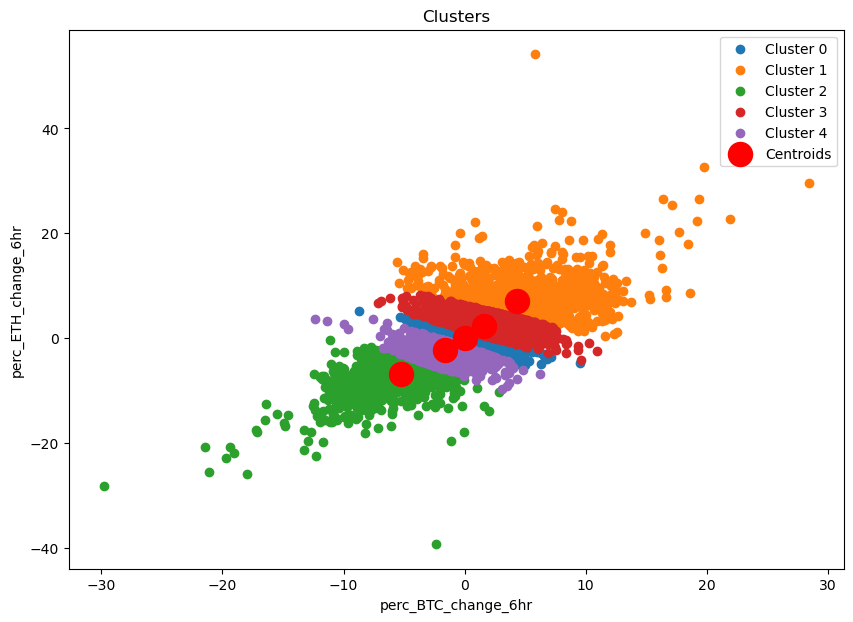

In [7]:
# Assuming km is your trained KMeans model and X is your original data
y_pred = km.predict(X)

plt.figure(figsize=(10, 7))

# Scatter plots of each cluster, with different colors
for i in range(km.n_clusters):
    cluster_i = X[y_pred == i]
    plt.scatter(cluster_i.iloc[:, 0], cluster_i.iloc[:, 1], label=f'Cluster {i}')

# Assuming km.cluster_centers_ are your calculated centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')

plt.title('Clusters')
plt.xlabel('perc_BTC_change_6hr') 
plt.ylabel('perc_ETH_change_6hr') 
plt.legend()
plt.show()


In [8]:
df.head(50)

,BTC_open,BTC_close,BTC_volume,ETH_open,ETH_close,ETH_volume,perc_BTC_change_1hr,perc_BTC_change_2hr,perc_BTC_change_3hr,perc_BTC_change_4hr,perc_BTC_change_5hr,perc_BTC_change_6hr,perc_BTC_change_7hr,perc_ETH_change_1hr,perc_ETH_change_2hr,perc_ETH_change_3hr,perc_ETH_change_4hr,perc_ETH_change_5hr,perc_ETH_change_6hr,perc_ETH_change_7hr
time,,,,,,,,,,,,,,,,,,,,
2016-12-10 03:00:00,774.14,773.22,300299.79,8.534,8.497,51562.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-10 04:00:00,773.22,774.38,445496.69,8.451,8.472,50452.13,0.150022,NaN,NaN,NaN,NaN,NaN,NaN,-0.294221,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-10 05:00:00,774.38,772.83,531621.78,8.472,8.486,37777.28,-0.200160,-0.050438,NaN,NaN,NaN,NaN,NaN,0.165250,-0.129457,NaN,NaN,NaN,NaN,NaN
2016-12-10 06:00:00,772.83,774.44,361825.55,8.482,8.624,27672.78,0.208325,0.007748,0.157782,NaN,NaN,NaN,NaN,1.626208,1.794145,1.494645,NaN,NaN,NaN,NaN
2016-12-10 07:00:00,774.44,770.87,334746.86,8.457,8.402,63425.22,-0.460978,-0.253613,-0.453266,-0.303924,NaN,NaN,NaN,-2.574212,-0.989866,-0.826251,-1.118042,NaN,NaN,NaN
2016-12-10 08:00:00,770.87,770.98,392906.40,8.450,8.343,35220.13,0.014270,-0.446774,-0.239380,-0.439061,-0.289698,NaN,NaN,-0.702214,-3.258349,-1.685128,-1.522663,-1.812404,NaN,NaN
2016-12-10 09:00:00,770.98,769.77,426715.62,8.365,8.337,123763.96,-0.156943,-0.142696,-0.603016,-0.395947,-0.595315,-0.446186,NaN,-0.071917,-0.773625,-3.327922,-1.755833,-1.593484,-1.883018,NaN
2016-12-10 10:00:00,769.77,770.58,526519.19,8.337,8.291,161424.32,0.105226,-0.051882,-0.037620,-0.498425,-0.291138,-0.490715,-0.341429,-0.551757,-0.623277,-1.321114,-3.861317,-2.297902,-2.136449,-2.424385
2016-12-10 11:00:00,770.58,772.30,585519.37,8.348,8.293,35921.98,0.223208,0.328670,0.171211,0.185505,-0.276329,-0.068579,-0.268602,0.024123,-0.527768,-0.599305,-1.297310,-3.838126,-2.274334,-2.112842


In [9]:
from statsmodels.tsa.stattools import grangercausalitytests
df.dropna(inplace=True)
maxlag=7

test_result = grangercausalitytests(df[['perc_BTC_change_1hr', 'perc_ETH_change_1hr']], maxlag=maxlag)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.1542 , p=0.0002  , df_denom=58074, df_num=1
ssr based chi2 test:   chi2=14.1550 , p=0.0002  , df=1
likelihood ratio test: chi2=14.1532 , p=0.0002  , df=1
parameter F test:         F=14.1542 , p=0.0002  , df_denom=58074, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.4657  , p=0.0006  , df_denom=58071, df_num=2
ssr based chi2 test:   chi2=14.9327 , p=0.0006  , df=2
likelihood ratio test: chi2=14.9308 , p=0.0006  , df=2
parameter F test:         F=7.4657  , p=0.0006  , df_denom=58071, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.3187  , p=0.0012  , df_denom=58068, df_num=3
ssr based chi2 test:   chi2=15.9580 , p=0.0012  , df=3
likelihood ratio test: chi2=15.9558 , p=0.0012  , df=3
parameter F test:         F=5.3187  , p=0.0012  , df_denom=58068, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9969  

In [10]:
btc_rise_threshold = 5

def get_next_6hr_window(df, index):
    if index+6 < len(df):
        return df.iloc[index:index+6]
    else:
        return None

windows_after_rise = pd.DataFrame()

for i in range(len(df) - 1):
    if df['perc_BTC_change_1hr'].iloc[i] > btc_rise_threshold:
        window = get_next_6hr_window(df, i)
        if window is not None:
            windows_after_rise = windows_after_rise.append(window)


C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\492813984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_after_rise = windows_after_rise.append(window)
C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\492813984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_after_rise = windows_after_rise.append(window)
C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\492813984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_after_rise = windows_after_rise.append(window)
C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\492813984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_after_rise = window

C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\492813984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_after_rise = windows_after_rise.append(window)
C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\492813984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_after_rise = windows_after_rise.append(window)
C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\492813984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_after_rise = windows_after_rise.append(window)
C:\Users\ssaam\AppData\Local\Temp\ipykernel_23596\492813984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_after_rise = window

In [19]:
print(windows_after_rise.shape)
windows_after_rise.head(50)

(402, 20)


,BTC_open,BTC_close,BTC_volume,ETH_open,ETH_close,ETH_volume,perc_BTC_change_1hr,perc_BTC_change_2hr,perc_BTC_change_3hr,perc_BTC_change_4hr,perc_BTC_change_5hr,perc_BTC_change_6hr,perc_BTC_change_7hr,perc_ETH_change_1hr,perc_ETH_change_2hr,perc_ETH_change_3hr,perc_ETH_change_4hr,perc_ETH_change_5hr,perc_ETH_change_6hr,perc_ETH_change_7hr
time,,,,,,,,,,,,,,,,,,,,
2017-01-07 10:00:00,824.16,867.68,8.454079e+06,9.742,9.883,973581.70,5.280528,5.444293,7.106442,4.150762,3.461516,5.348275,5.382822,1.447341,3.087514,5.171863,2.980098,2.478225,3.259847,3.922187
2017-01-07 11:00:00,867.68,866.74,3.211431e+06,9.883,9.872,531832.58,-0.108335,5.166473,5.330060,6.990409,4.037931,3.349431,5.234146,-0.111302,1.334428,2.972776,5.054805,2.865479,2.364164,3.144917
2017-01-07 12:00:00,866.74,880.20,5.288778e+06,9.872,9.902,456132.49,1.552946,1.442928,6.799651,6.965779,8.651911,5.653583,4.954391,0.303890,0.192249,1.642373,3.285699,5.374056,3.178076,2.675238
2017-01-07 13:00:00,880.20,860.78,6.072165e+06,9.902,9.813,381897.54,-2.206317,-0.687634,-0.795224,4.443312,4.605775,6.254706,3.322530,-0.898808,-0.597650,-0.708287,0.728803,2.357359,4.426945,2.250703
2017-01-07 14:00:00,860.78,874.79,4.048306e+06,9.813,9.920,206495.80,1.627594,-0.614633,0.928768,0.819427,6.143225,6.308332,7.984101,1.090390,0.181781,0.486224,0.374380,1.827140,3.473454,5.565606
2017-01-07 15:00:00,874.79,879.03,6.806036e+06,9.920,9.924,293061.77,0.484688,2.120170,-0.132924,1.417957,1.308086,6.657688,6.823595,0.040323,1.131153,0.222177,0.526742,0.414854,1.868200,3.515177
2017-03-10 13:00:00,1199.95,1268.92,3.985328e+07,17.840,18.370,1886738.18,5.747739,5.987989,5.856247,6.474458,6.916745,6.738671,6.943777,2.970852,4.315730,3.843980,3.318335,2.740492,2.339833,1.379691
2017-03-10 14:00:00,1268.92,1253.11,1.535218e+07,18.370,18.250,735190.50,-1.245941,4.430185,4.667441,4.537340,5.147849,5.584625,5.408770,-0.653239,2.298206,3.634299,3.165630,2.643420,2.069351,1.671309
2017-03-10 15:00:00,1253.11,1239.81,1.584229e+07,18.250,18.890,5626238.48,-1.061359,-2.294077,3.321805,3.556543,3.427823,4.031852,4.463992,3.506849,2.830702,5.885650,7.268597,6.783493,6.242970,5.648770


In [74]:
window_itr

Series([], Name: perc_ETH_change_1hr, dtype: float64)

In [77]:
eth_rise_threshold = 3
lag_times = []
met_thresholds = []

for i in range(0, len(windows_after_rise), 6):
    window = windows_after_rise.iloc[i:i+6]
    if any(window['perc_ETH_change_6hr'] > eth_rise_threshold):
        for i in np.arange(1,6):
            window_itr = window[window[f'perc_ETH_change_{i}hr'] > eth_rise_threshold][f'perc_ETH_change_{i}hr']
            window_itr.idxmax()
        rise_time = window[window['perc_ETH_change_6hr'] > eth_rise_threshold]['perc_ETH_change_6hr'].idxmax()
        lag_time = rise_time - window.index[0]
        met_threshold = int(1)
    else:
        lag_time = timedelta(0)
        met_threshold = int(0)
        
    lag_times.append(lag_time)
    met_thresholds.append(met_threshold)
    
    for _ in range(5):
        lag_times.append(None)
        met_thresholds.append(None)

# Convert lag times to a DataFrame
lag_times_df = pd.DataFrame({
    'lag_time': lag_times,
    'met_threshold': met_thresholds
})

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [84]:
window_itr.empty

True

In [91]:
eth_rise_threshold = 3
lag_times = []
met_thresholds = []

for i in range(0, len(windows_after_rise), 6):
    window = windows_after_rise.iloc[i:i+6]
    if any(window['perc_ETH_change_6hr'] > eth_rise_threshold):
        for i in np.arange(1,6):
            window_itr = window[window[f'perc_ETH_change_{i}hr'] > eth_rise_threshold][f'perc_ETH_change_{i}hr']
            if window_itr.empty == False: 
                rise_time = window_itr.idxmax()
                lag_time = rise_time - window.index[0]
                met_threshold = int(1)
            else:
                lag_time = timedelta(0)
                met_threshold = int(0)
        
    lag_times.append(lag_time)
    met_thresholds.append(met_threshold)
    
    for _ in range(5):
        lag_times.append(None)
        met_thresholds.append(None)

# Convert lag times to a DataFrame
lag_times_df = pd.DataFrame({
    'lag_time': lag_times,
    'met_threshold': met_thresholds
})


In [92]:
len(met_thresholds)

402

In [93]:
lag_times_df.shape

(402, 2)

In [94]:
lag_times_df.head(50)

,lag_time,met_threshold
0,0 days 02:00:00,1.0
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN
5,NaT,NaN
6,0 days 02:00:00,1.0
7,NaT,NaN
8,NaT,NaN
9,NaT,NaN
